In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist, cifar10
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
#Importing the ResNet50 model
from keras.applications.resnet50 import ResNet50, preprocess_input

from scipy.misc import imread, imsave, imresize

import matplotlib.pylab as plt
import numpy as np 

# load the data already splits into train and test data sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# input image dimensions
img_x, img_y, channels = 32, 32, 3

keras.backend.set_image_data_format('channels_last')
input_shape = (img_x, img_y, channels)
# reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, channels)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, channels)

cifar10_labels={
    0: "airplane", 
    1: "automobile", 
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

num_classes = len(cifar10_labels)

# convert class vectors to binary class matrices for categorical_crossentropy loss
# convert class vectors to binary class matrices for categorical_crossentropy loss
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


In [2]:
# TODO: Convert the images (x_train and x_test) to float32
x_train_con = x_train.astype('float32')
x_test_con = x_test.astype('float32')
#x_train_con

In [3]:
# TODO: Scale the pixel values (x_train and x_test) from range 0..255 to 0..1
x_Train = x_train_con / 255
x_Test = x_test_con / 255
#x_Train

In [4]:


#Loading the ResNet50 model with pre-trained ImageNet weights
model = ResNet50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

In [7]:
#Reshaping the training data to suits to the ResNet model so we converting 32X32X3 dimensions to( 200X200X3 )


# Implemented the conversion to first 5000 training samples and 1000 test samples due to my computer computational power 
#X_train_new = np.array([imresize(x_Train[i], (200, 200, 3)) for i in range(0, len(x_Train))]).astype('float32')
#X_test_new = np.array([imresize(x_Test[i], (200, 200, 3)) for i in range(0, len(x_Test))]).astype('float32')
X_train_new = np.array([imresize(x_Train[i], (200, 200, 3)) for i in range(0, 5000)]).astype('float32')
X_test_new = np.array([imresize(x_Test[i], (200, 200, 3)) for i in range(0, 1000)]).astype('float32')

In [19]:
#Y_train_new = (y_train[i] for i in range(0, 5000))
#Y_test_new =  (y_test[i] for i in range(0, 1000))
# If computation capability of the laptop is less please go with 5000 samples for training and 1000 samples for testing
#Y_train_new = y_train[:5000] 
#Y_test_new =  y_test[:1000]
Y_train_new = y_train
Y_test_new =  y_test

In [11]:
#Preprocessing the data, so that it can be fed to the pre-trained ResNet50 model. 
resnet_train_input = preprocess_input(X_train_new)
resnet_test_input = preprocess_input(X_test_new)

#Creating bottleneck features for the training data using the Resenet 
train_features = model.predict(resnet_train_input)
test_features = model.predict(resnet_test_input)


In [14]:
from keras.layers import GlobalAveragePooling2D, Dropout
model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=train_features.shape[1:]))
model.add(Dropout(0.3))
model.add(Dense(num_classes , activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20490     
Total params: 20,490
Trainable params: 20,490
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_features, Y_train_new, validation_data=(test_features , Y_test_new),  batch_size=64,epochs=10)

Train on 5000 samples, validate on 1000 samples
Epoch 1/10
5000/5000 [==============================] - 2s - loss: 1.0794 - acc: 0.6300 - val_loss: 0.5288 - val_acc: 0.8230
Epoch 2/10
5000/5000 [==============================] - 0s - loss: 0.4912 - acc: 0.8328 - val_loss: 0.4301 - val_acc: 0.8530
Epoch 3/10
5000/5000 [==============================] - 0s - loss: 0.3921 - acc: 0.8694 - val_loss: 0.4197 - val_acc: 0.8510
Epoch 4/10
5000/5000 [==============================] - 0s - loss: 0.3380 - acc: 0.8886 - val_loss: 0.3970 - val_acc: 0.8590
Epoch 5/10
5000/5000 [==============================] - 0s - loss: 0.2984 - acc: 0.8994 - val_loss: 0.3767 - val_acc: 0.8690
Epoch 6/10
5000/5000 [==============================] - 0s - loss: 0.2683 - acc: 0.9090 - val_loss: 0.3804 - val_acc: 0.8560
Epoch 7/10
5000/5000 [==============================] - 0s - loss: 0.2464 - acc: 0.9192 - val_loss: 0.3677 - val_acc: 0.8670
Epoch 8/10
5000/5000 [==============================] - 0s - loss: 0.2189 - a

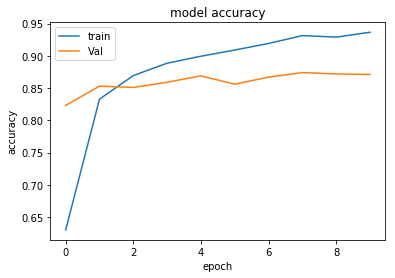

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()
